In [5]:
import os
import numpy as np 
import pandas as pd 
import re
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
#!pip install neattext
import neattext as ntx

In [6]:
path='C:/Users/dadia/Desktop/FastAI/vaccination_all_tweets.csv'
data = pd.read_csv(path)

# 数据

In [7]:
data.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified  \
0             405          1692             3247          False   
1             834           666              178          False   
2              10            88              155          False   
3           49165          3933            21853           True   
4             152           580             1473          False   

                  date                                               text  \
0  2020-12-20 06:06:44  Same folks said daikon paste could treat a cyt...   
1  2020-12-13 16:27:13  While the world has been on the wrong side of ...   
2  2020-12-12 20:33:45  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  2020-12-12 20:23:59  Facts are immutable, Senator, even when you're...   
4  2020-12-12 20:17:19  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [8]:
display(data.shape, str(data.shape[0])+" tweets in dataset")   

(69718, 16)

'69718 tweets in dataset'

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69718 entries, 0 to 69717
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                69718 non-null  int64 
 1   user_name         69718 non-null  object
 2   user_location     53891 non-null  object
 3   user_description  64846 non-null  object
 4   user_created      69718 non-null  object
 5   user_followers    69718 non-null  int64 
 6   user_friends      69718 non-null  int64 
 7   user_favourites   69718 non-null  int64 
 8   user_verified     69718 non-null  bool  
 9   date              69718 non-null  object
 10  text              69718 non-null  object
 11  hashtags          54904 non-null  object
 12  source            69599 non-null  object
 13  retweets          69718 non-null  int64 
 14  favorites         69718 non-null  int64 
 15  is_retweet        69718 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 7.6+ MB


In [10]:
data.isna().sum()

id                      0
user_name               0
user_location       15827
user_description     4872
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            14814
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

缺失值不管我们的事，无脑删掉

In [11]:
data['date'] = pd.to_datetime(data['date']).dt.date  #converting date column to date format
data.head()

id             user_name              user_location  \
0  1340539111971516416            Rachel Roh  La Crescenta-Montrose, CA   
1  1338158543359250433           Albert Fong          San Francisco, CA   
2  1337858199140118533              eli🇱🇹🇪🇺👌                   Your Bed   
3  1337855739918835717         Charles Adler     Vancouver, BC - Canada   
4  1337854064604966912  Citizen News Channel                        NaN   

                                    user_description         user_created  \
0  Aggregator of Asian American news; scanning di...  2009-04-08 17:52:46   
1  Marketing dude, tech geek, heavy metal & '80s ...  2009-09-21 15:27:30   
2                                     heil, hydra 🖐☺  2020-06-25 23:30:28   
3  Hosting "CharlesAdlerTonight" Global News Radi...  2008-09-10 11:28:53   
4  Citizen News Channel bringing you an alternati...  2020-04-23 17:58:42   

   user_followers  user_friends  user_favourites  user_verified        date  \
0             405          1692             3247          False  2020-12-20   
1             834           666              178          False  2020-12-13   
2              10            88              155          False  2020-12-12   
3           49165          3933            21853           True  2020-12-12   
4             152           580             1473          False  2020-12-12   

                                                text  \
0  Same folks said daikon paste could treat a cyt...   
1  While the world has been on the wrong side of ...   
2  #coronavirus #SputnikV #AstraZeneca #PfizerBio...   
3  Facts are immutable, Senator, even when you're...   
4  Explain to me again why we need a vaccine @Bor...   

                                            hashtags               source  \
0                                 ['PfizerBioNTech']  Twitter for Android   
1                                                NaN      Twitter Web App   
2  ['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...  Twitter for Android   
3                                                NaN      Twitter Web App   
4     ['whereareallthesickpeople', 'PfizerBioNTech']   Twitter for iPhone   

   retweets  favorites  is_retweet  
0         0          0       False  
1         1          1       False  
2         0          0       False  
3       446       2129       False  
4         0          0       False

In [12]:
# plt.figure(figsize=(15,10))
# data['user_location'].value_counts().nlargest(20).plot(kind='bar')
# plt.xticks(rotation=60)

In [13]:
data=data.drop_duplicates('text')             
data.shape

(69621, 16)

In [14]:
data.source.value_counts()

Twitter Web App                 21538
Twitter for iPhone              20599
Twitter for Android             18572
TweetDeck                        2883
Twitter for iPad                 1412
                                ...  
Woofy Social Media Scheduler        1
Tweepsmap                           1
Collected Times Top Stories         1
TradingView                         1
Flamingo for Android                1
Name: source, Length: 210, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Twitter Web App'),
  Text(1, 0, 'Twitter for iPhone'),
  Text(2, 0, 'Twitter for Android'),
  Text(3, 0, 'TweetDeck'),
  Text(4, 0, 'Twitter for iPad'),
  Text(5, 0, 'Instagram')])

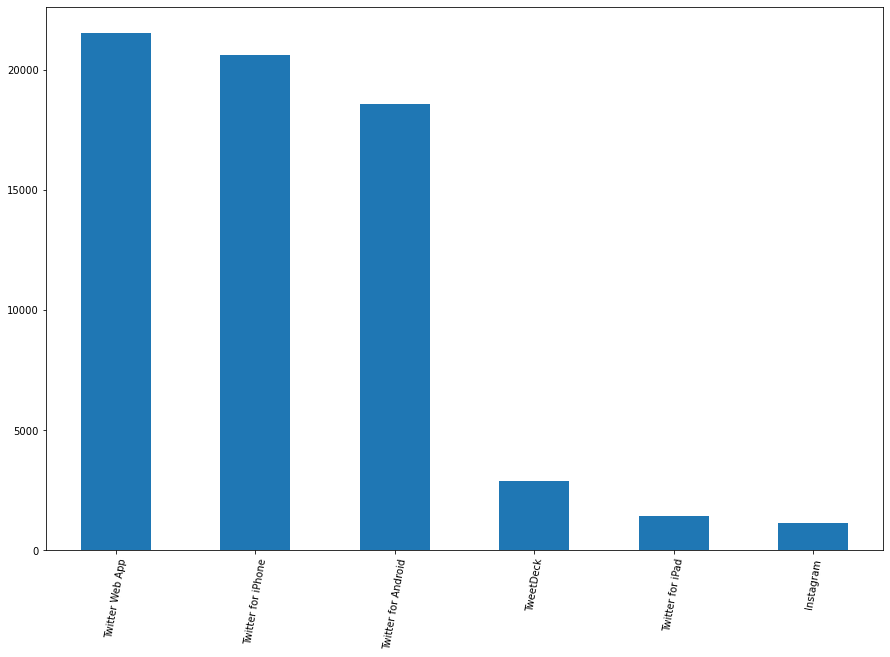

In [15]:
#分类可视化，我们之后可以用不同的team或者不同的group来划分 
plt.figure(figsize=(15,10))
data['source'].value_counts().nlargest(6).plot(kind='bar')
plt.xticks(rotation=80)

In [16]:
len(data['date'].unique())  #时间轴

132

In [17]:
data.sort_values(by=['date'], ascending=[True]).head(5) #根据时间排序一下

id                    user_name  \
294  1337884374927368201                     Nacindex   
34   1337742528108519424                  Rajat Kotra   
35   1337739607857917954  Shahjhan Malik | #WearAMask   
36   1337735595704115200                   John Berry   
37   1337734069816348673                 Farooq Anees   

                     user_location  \
294                            NaN   
34                 London, England   
35        Nottinghamshire, England   
36                             NaN   
37   دبي, الامارات العربية المتحدة   

                                      user_description         user_created  \
294  Tweet and RT all things #OpenFinance #bitcoin ...  2019-03-16 15:14:32   
34   Ever-curious polymath,#global leader#startups#...  2009-12-03 12:03:28   
35   Solicitor.Dual Qualified.Single Parent Of 2 Am...  2017-06-22 06:22:55   
36   English (not British or European) beer swillin...  2020-10-13 15:21:27   
37      Somethings are better not be disclosed.... \o/  2010-12-23 11:51:01   

     user_followers  user_friends  user_favourites  user_verified        date  \
294             331           431             1132          False  2020-12-12   
34              754           917              220          False  2020-12-12   
35            41708          2868            47862          False  2020-12-12   
36                2             0                0          False  2020-12-12   
37              293           319              165          False  2020-12-12   

                                                  text  \
294  https://t.co/Z3j0NbDUbq\nUS agency authorizes ...   
34   Vaccine!! Anyone?? #covid #Pfizervaccine #Pfiz...   
35   An immigrant Muslim couple find the COVID-19 V...   
36   The #FDA finally issues #EUA now comes the pro...   
37   Ladies and Gentlemen, now we have #CovidVaccin...   

                                              hashtags               source  \
294                                                NaN      Twitter Web App   
34        ['covid', 'Pfizervaccine', 'PfizerBioNTech']  Twitter for Android   
35   ['CovidVaccine', 'PfizerBioNTech', 'Pfizervacc...   Twitter for iPhone   
36                    ['FDA', 'EUA', 'PfizerBioNTech']      Twitter Web App   
37   ['CovidVaccine', 'Pakistan', 'PfizerBioNTech',...  Twitter for Android   

     retweets  favorites  is_retweet  
294         1          0       False  
34          0          0       False  
35          2         37       False  
36          0          0       False  
37          0          0       False

In [18]:
data.drop(columns={"id","user_name","user_description","user_created","user_followers",\
                   "user_friends","user_favourites","user_verified","hashtags","source","retweets","favorites","is_retweet"},inplace=True)
# filter out不需要的column

In [19]:
pd.set_option('display.max_colwidth', 700)
data.head()

user_location        date  \
0  La Crescenta-Montrose, CA  2020-12-20   
1          San Francisco, CA  2020-12-13   
2                   Your Bed  2020-12-12   
3     Vancouver, BC - Canada  2020-12-12   
4                        NaN  2020-12-12   

                                                                                                                                           text  
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF  
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm  
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P  
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4  
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq

In [20]:
# 发现了一个更强大的package来清理数据
data['clean_data']=data['text'].apply(ntx.remove_hashtags)
data['clean_data']=data['clean_data'].apply(ntx.remove_urls)
data['clean_data']=data['clean_data'].apply(ntx.remove_userhandles)
data['clean_data']=data['clean_data'].apply(ntx.remove_multiple_spaces)
data['clean_data']=data['clean_data'].apply(ntx.remove_special_characters)

In [21]:
data[['clean_data','text']].head()

clean_data  \
0                                                         Same folks said daikon paste could treat a cytokine storm    
1  While the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev    
2                                                                       Russian vaccine is created to last 24 years    
3     Facts are immutable Senator even when youre not ethically sturdy enough to acknowledge them 1 You were born i    
4                                                                         Explain to me again why we need a vaccine    

                                                                                                                                           text  
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF  
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm  
2  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P  
3  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4  
4       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq

# 这个时候就是我们设置主观值和情绪值

In [26]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11004]
[nltk_data]     getaddrinfo failed>


False

In [27]:
#stop words就是那些类似I you me and等等等等
stop_words = stopwords.words('english')   
len(stop_words),stop_words[5:10]

(179, ['our', 'ours', 'ourselves', 'you', "you're"])

In [28]:
# 启用这个功能
def stopWords(tweet):
  clean_tweet = tweet
  clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
# clean_tweet = " ".join(lemmatizer.lemmatize(word) for word in clean_tweet.split())
  return clean_tweet

In [29]:
data['clean_data'] = data['clean_data'].apply(lambda x: stopWords(x))

In [30]:
data.head(2) #瞅一眼

user_location        date  \
0  La Crescenta-Montrose, CA  2020-12-20   
1          San Francisco, CA  2020-12-13   

                                                                                                                                           text  \
0                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF   
1  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm   

                                                                         clean_data  
0                           Same folks said daikon paste could treat cytokine storm  
1  While world wrong side history year hopefully biggest vaccination effort weve ev

In [31]:
from textblob import TextBlob
#赋值
def blob_fun(text):
  senti = TextBlob(text)
  senti_polarity = senti.sentiment.polarity
  senti_subjectivity = senti.sentiment.subjectivity

  if senti_polarity > 0:
    res = 'Positive'

  elif senti_polarity < 0:
    res = 'Negative'

  elif senti_polarity == 0:
    res ="Neutral"

  result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}

  return result

In [32]:
blob_fun(data['clean_data'][5])

{'polarity': 0.4, 'subjectivity': 0.25, 'sentiment': 'Positive'}

In [33]:
blob_fun('I am Covid-19 negative') #可以不断进行测试

{'polarity': -0.3, 'subjectivity': 0.4, 'sentiment': 'Negative'}

In [34]:
data['results'] = data['clean_data'].apply(blob_fun)

In [35]:
data.drop(columns={"user_location",'text'},inplace=True)

In [36]:
data.head(2)

date  \
0  2020-12-20   
1  2020-12-13   

                                                                         clean_data  \
0                           Same folks said daikon paste could treat cytokine storm   
1  While world wrong side history year hopefully biggest vaccination effort weve ev   

                                                            results  
0  {'polarity': 0.0, 'subjectivity': 0.125, 'sentiment': 'Neutral'}  
1  {'polarity': -0.5, 'subjectivity': 0.9, 'sentiment': 'Negative'}

In [40]:
data = data.join(pd.json_normalize(data=data['results']))

In [41]:
data.head()

date  \
0  2020-12-20   
1  2020-12-13   
2  2020-12-12   
3  2020-12-12   
4  2020-12-12   

                                                                          clean_data  \
0                            Same folks said daikon paste could treat cytokine storm   
1   While world wrong side history year hopefully biggest vaccination effort weve ev   
2                                              Russian vaccine created last 24 years   
3  Facts immutable Senator even youre ethically sturdy enough acknowledge 1 You born   
4                                                               Explain need vaccine   

                                                                          results  \
0                {'polarity': 0.0, 'subjectivity': 0.125, 'sentiment': 'Neutral'}   
1                {'polarity': -0.5, 'subjectivity': 0.9, 'sentiment': 'Negative'}   
2  {'polarity': 0.0, 'subjectivity': 0.03333333333333333, 'sentiment': 'Neutral'}   
3                {'polarity': 0.1, 'subjectivity': 0.55, 'sentiment': 'Positive'}   
4                  {'polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}   

   polarity  subjectivity sentiment  
0       0.0      0.125000   Neutral  
1      -0.5      0.900000  Negative  
2       0.0      0.033333   Neutral  
3       0.1      0.550000  Positive  
4       0.0      0.000000   Neutral

In [42]:
# 分类
positive_tweet =  data[data['sentiment'] == 'Positive']['clean_data']
negative_tweet =  data[data['sentiment'] == 'Negative']['clean_data']
neutral_tweet =  data[data['sentiment'] == 'Neutral']['clean_data']

In [43]:
from wordcloud import WordCloud
# 大字报
def cloud_of_Words(tweet_cat,title):
    forcloud = ' '.join([tweet for tweet in tweet_cat])
    wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110).generate(forcloud)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.figure(figsize = (10,8))

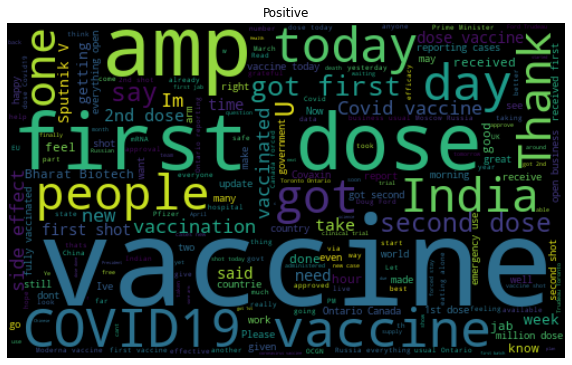

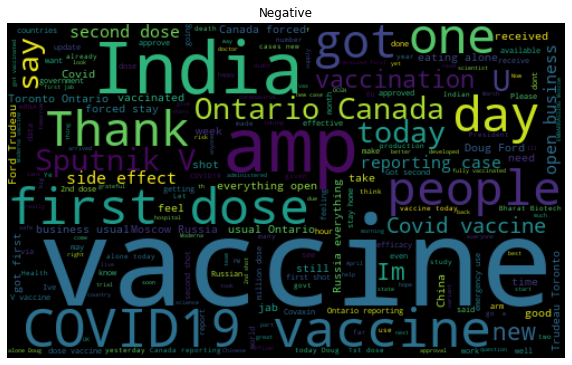

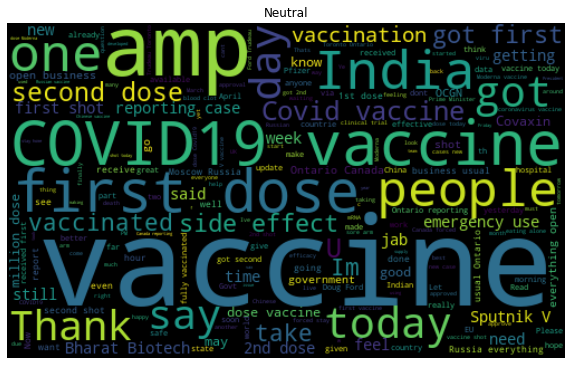

<Figure size 720x576 with 0 Axes>

In [44]:
plt.figure(figsize = (10,8))
# 从postitive,netural和negative三个方面可视化
cloud_of_Words(positive_tweet, 'Positive')
cloud_of_Words(negative_tweet, 'Negative')
cloud_of_Words(neutral_tweet, 'Neutral')

In [45]:
# 把每句话分解成单词
positive_tokens = [token for line in positive_tweet for token in line.split()]
negative_tokens = [token for line in negative_tweet for token in line.split()]
neutral_tokens = [token for line in neutral_tweet for token in line.split()]

In [46]:
from collections import Counter
# 找出频率最高的单词
def get_maxtoken(tweets,num=30):
  word_tokens = Counter(tweets)
  max_common = word_tokens.most_common(num)
  return dict(max_common)

In [47]:
def token_df_vis(x, title):
  df = pd.DataFrame(get_maxtoken(x).items(),columns=['words','count'])
  plt.figure(figsize = (20,5))
  plt.title(title)
  plt.xticks(rotation=45)
  fig = px.bar(df,x='words',y='count',title = title)
  fig.show()

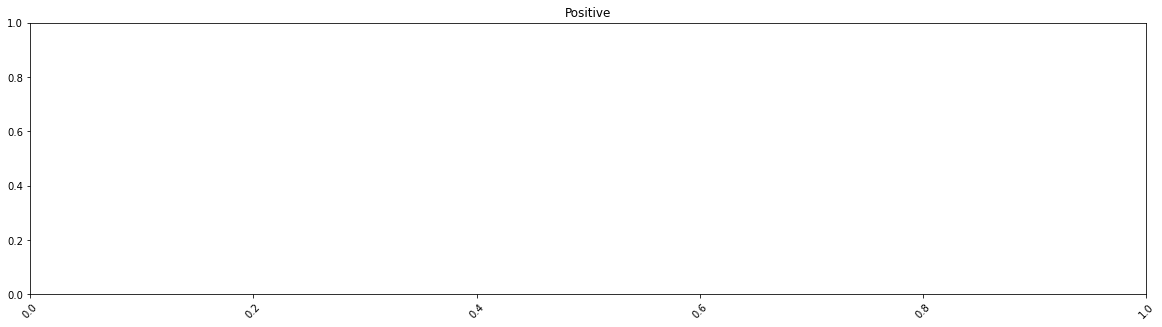

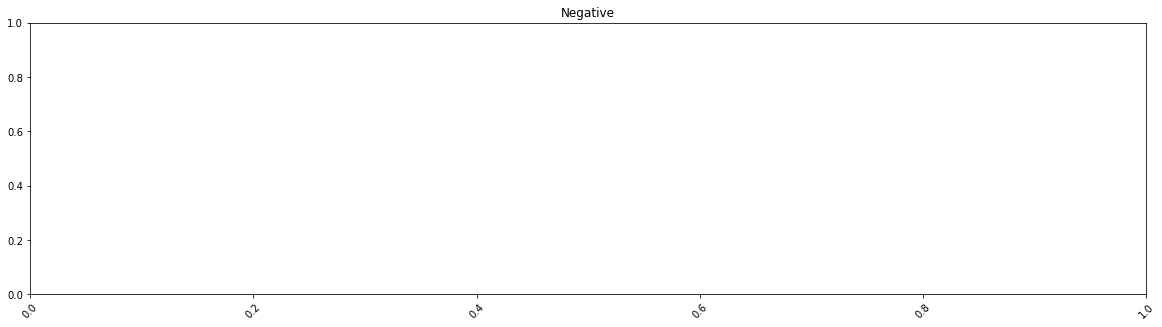

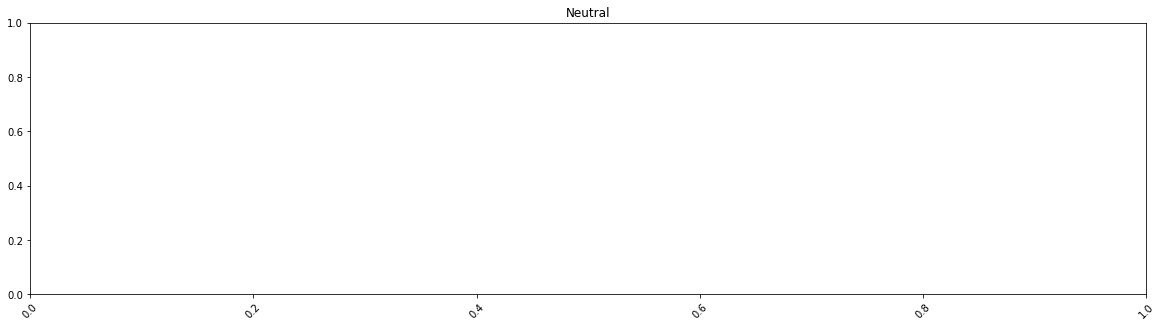

In [48]:
token_df_vis(positive_tokens,'Positive')
token_df_vis(negative_tokens,'Negative')
token_df_vis(neutral_tokens,'Neutral')

In [49]:
fig = px.scatter(data,x='polarity',y='subjectivity')
fig.show()

In [50]:
def percent(x,y):
  return print("Percentage of "+y+" tweets :",round(len(x)/data.shape[0]*100,3),"%")

In [51]:
percent(positive_tweet, 'positive')
percent(negative_tweet, 'negative')
percent(neutral_tweet, 'neutral')

Percentage of positive tweets : 38.389 %
Percentage of negative tweets : 12.371 %
Percentage of neutral tweets : 49.1 %


<AxesSubplot:>

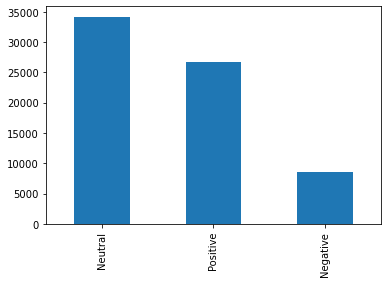

In [52]:
data['sentiment'].value_counts().plot(kind='bar')

# 同样的根据不同的group去进行分析

In [53]:
data.columns

Index(['date', 'clean_data', 'results', 'polarity', 'subjectivity',
       'sentiment'],
      dtype='object')

In [54]:
deep = data.drop(columns="results")
deep.head(2)

date  \
0  2020-12-20   
1  2020-12-13   

                                                                         clean_data  \
0                           Same folks said daikon paste could treat cytokine storm   
1  While world wrong side history year hopefully biggest vaccination effort weve ev   

   polarity  subjectivity sentiment  
0       0.0         0.125   Neutral  
1      -0.5         0.900  Negative

In [55]:
# creating reference tags for 5 vaccines -> Pfizer, Covaxin(Bharat Biotech), Sputnik,AstraZenca(Covishield),Moderna
pfizer_refs = ["Pfizer","pfizer","Pfizer–BioNTech","pfizer-bioNtech","BioNTech","biontech"]
bbiotech_refs = ["covax","covaxin","Covax","Covaxin","Bharat Biotech","bharat biotech","BharatBiotech","bharatbiotech"]
sputnik_refs = ["russia","sputnik","Sputnik","V"]
astra_refs = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna_refs = ['moderna','Moderna','mRNA-1273','Spikevax']

In [56]:
def refer(tweet, refs):
  flag =0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag =1
  return flag

deep['pfizer'] = deep['clean_data'].apply(lambda x : refer(x, pfizer_refs))
deep['bbiotech'] = deep['clean_data'].apply(lambda x : refer(x, bbiotech_refs))
deep['sputnik'] = deep['clean_data'].apply(lambda x : refer(x, sputnik_refs))
deep['astra'] = deep['clean_data'].apply(lambda x : refer(x, astra_refs))
deep['moderna'] = deep['clean_data'].apply(lambda x : refer(x, moderna_refs))

In [57]:
display(deep.pfizer.value_counts(),deep.bbiotech.value_counts(),deep.sputnik.value_counts(),deep.astra.value_counts(),deep.moderna.value_counts())

0    68261
1     1360
Name: pfizer, dtype: int64

0    68084
1     1537
Name: bbiotech, dtype: int64

0    59307
1    10314
Name: sputnik, dtype: int64

0    69340
1      281
Name: astra, dtype: int64

0    67480
1     2141
Name: moderna, dtype: int64

In [58]:
deep[deep['bbiotech']==1].head()    #what the dataset looks like

date  \
1592  2020-12-26   
2202  2021-01-03   
2383  2021-01-05   
4138  2021-01-21   
5399  2021-02-07   

                                                                                           clean_data  \
1592            The country part Gavi Vaccine Alliance oversees Covax UNs global vaccine access mecha   
2202  India approves AstraZeneca Bharat Biotech vaccines PfizerBioNTech approvals follow India 103 mi   
2383                 Covid19 Vaccine War Covaxin Maker Bharat Biotech On Adars Safe Like Water Remark   
4138  Covishield vs Covaxin vs ModernaPfizer Science Behind COVID19 Vaccines Careers Vaccine Research   
5399                                 Dr Bharat Biotech Signs US Partner IndiaApproved COVID19 Vaccine   

      polarity  subjectivity sentiment  pfizer  bbiotech  sputnik  astra  \
1592  0.000000      0.000000   Neutral       0         1        1      0   
2202  0.000000      0.000000   Neutral       1         1        0      0   
2383  0.500000      0.500000  Positive       0         1        1      0   
4138  0.227273      0.545455  Positive       1         1        1      1   
5399  0.000000      0.000000   Neutral       0         1        1      0   

      moderna  
1592        0  
2202        0  
2383        0  
4138        1  
5399        0

In [59]:
deep[deep['pfizer']==1].head()

date  \
23  2020-12-12   
66  2020-12-14   
88  2020-12-14   
94  2020-12-14   
98  2020-12-14   

                                                                                      clean_data  \
23  The US Food Drug Administration FDA granted emergency use authorization PfizerBioNTechs mRNA   
66               ICU nurse Sandra Lindsay said proud becoming one first Americans receive Pfizer   
88                     KFDMsFOX 4s Baptist hospital getting first hand look Pfizer COVID19 vacci   
94                               Toronto receive Ontarios 1st doses Pfizer COVID19 vaccine today   
98                                        The FDA Authorizes Emergency Use Of The Pfizer Vaccine   

    polarity  subjectivity sentiment  pfizer  bbiotech  sputnik  astra  \
23      0.00      0.000000   Neutral       1         0        0      0   
66      0.50      0.727778  Positive       1         0        0      0   
88      0.25      0.333333  Positive       1         0        1      0   
94      0.00      0.000000   Neutral       1         0        1      0   
98      0.00      0.000000   Neutral       1         0        1      0   

    moderna  
23        0  
66        0  
88        0  
94        0  
98        0

In [60]:
def stats(a,b,c,d,e):
  for i in a,b,c,d,e:
     display(deep[deep[i]==1][[i,'polarity','subjectivity']].groupby(i).agg([np.mean,np.max,np.min,np.median]))

In [61]:
stats('pfizer','bbiotech','sputnik','astra','moderna')

polarity                  subjectivity                    
            mean amax amin median         mean amax amin    median
pfizer                                                            
1       0.092286  1.0 -1.0    0.0     0.258799  1.0  0.0  0.166667

polarity                  subjectivity                    
             mean amax amin median         mean amax amin    median
bbiotech                                                           
1         0.10508  1.0 -1.0    0.0     0.255345  1.0  0.0  0.083333

polarity                  subjectivity                 
             mean amax amin median         mean amax amin median
sputnik                                                         
1        0.090089  1.0 -1.0    0.0     0.266408  1.0  0.0    0.2

polarity                  subjectivity                 
           mean amax amin median         mean amax amin median
astra                                                         
1      0.092494  1.0 -0.7    0.0     0.249845  1.0  0.0    0.0

polarity                  subjectivity                 
             mean amax amin median         mean amax amin median
moderna                                                         
1        0.096854  1.0 -0.9    0.0     0.283564  1.0  0.0   0.25

In [62]:
pfizer = deep[deep['pfizer']==1][['date','polarity']]
bbiotech = deep[deep['bbiotech']==1][['date','polarity']]
sputnik = deep[deep['sputnik']==1][['date','polarity']]
astra = deep[deep['astra']==1][['date','polarity']]
moderna = deep[deep['moderna']==1][['date','polarity']]

pfizer = pfizer.sort_values(by='date',ascending=True)
bbiotech = bbiotech.sort_values(by='date',ascending=True)
sputnik = sputnik.sort_values(by='date',ascending=True)
astra = astra.sort_values(by='date',ascending=True)
moderna = moderna.sort_values(by='date',ascending=True)

pfizer['Avg Polarity'] = pfizer.polarity.rolling(20, min_periods=3).mean()
bbiotech['Avg Polarity'] = bbiotech.polarity.rolling(20, min_periods=3).mean()
sputnik['Avg Polarity'] = sputnik.polarity.rolling(20, min_periods=3).mean()
astra['Avg Polarity'] = astra.polarity.rolling(5, min_periods=3).mean()
moderna['Avg Polarity'] = moderna.polarity.rolling(20, min_periods=3).mean()

In [63]:
bbiotech.head(10)

date  polarity  Avg Polarity
1592  2020-12-26  0.000000           NaN
2202  2021-01-03  0.000000           NaN
2383  2021-01-05  0.500000      0.166667
4138  2021-01-21  0.227273      0.181818
5399  2021-02-07  0.000000      0.145455
5401  2021-02-07  0.300000      0.171212
5629  2021-02-07  0.500000      0.218182
5630  2021-02-07  0.000000      0.190909
5840  2021-02-08  0.800000      0.258586
6068  2021-02-08  0.000000      0.232727

# 情感的平均值随着时间的变化

In [64]:
a,b,c,d,e = pfizer,bbiotech,sputnik,astra,moderna
fig = px.line(a, x="date", y="Avg Polarity", title='Pfizer')
fig.show()
fig = px.line(b, x="date", y="Avg Polarity", title='Bharat Biotech')
fig.show()
fig = px.line(c, x="date", y="Avg Polarity", title='Sputnik')
fig.show()
fig = px.line(d, x="date", y="Avg Polarity", title='AstraZence/Covishield')
fig.show()
fig = px.line(e, x="date", y="Avg Polarity", title='Moderna')
fig.show()

# 整体的情感变化

In [65]:
total=pd.DataFrame()
total['date'] = sorted(deep['date'].unique())
senti=list()
for date in total['date']:
    senti.append(deep[deep['date']==date].polarity.mean())
total['Sentiment']=senti
fig = px.line(total, x="date", y="Sentiment", title='Overall Sentiment around Vaccines')
fig.show()   